### Importing Libraries

In [124]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
#matplotlib notebook
%matplotlib inline
import seaborn as sns

#from sklearn import matrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


### Load Dataset

In [125]:
dataset = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

### Load Summarize or EDA

In [126]:
print(dataset.shape)
print(dataset.describe())

(414, 9)
       Transaction_date   House_age  Distance_from_nearest_MetroStation_in_km  \
count        414.000000  414.000000                                414.000000   
mean        2013.148953   17.712560                               1083.885689   
std            0.281995   11.392485                               1262.109595   
min         2012.666667    0.000000                                 23.382840   
25%         2012.916667    9.025000                                289.324800   
50%         2013.166667   16.100000                                492.231300   
75%         2013.416667   28.150000                               1454.279000   
max         2013.583333   43.800000                               6488.021000   

       Number_of_convenience_stores    latitude   longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.094203   24.969030  121.533361   
std                        2.945562    0.012410    0.015347   
min      

In [127]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction_date                          414 non-null    float64
 1   House_age                                 414 non-null    float64
 2   Distance_from_nearest_MetroStation_in_km  414 non-null    float64
 3   Number_of_convenience_stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number_of_bedrooms                        414 non-null    int64  
 7   House_size_sqft                           414 non-null    int64  
 8   House_price_of_unit_area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB
None


In [128]:
print(dataset.head())

   Transaction_date  House_age  Distance_from_nearest_MetroStation_in_km  \
0       2012.916667       32.0                                  84.87882   
1       2012.916667       19.5                                 306.59470   
2       2013.583333       13.3                                 561.98450   
3       2013.500000       13.3                                 561.98450   
4       2012.833333        5.0                                 390.56840   

   Number_of_convenience_stores  latitude  longitude  Number_of_bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House_size_sqft  House_price_of_unit_area  
0              575                     

In [129]:
print(dataset.isnull().sum())

Transaction_date                            0
House_age                                   0
Distance_from_nearest_MetroStation_in_km    0
Number_of_convenience_stores                0
latitude                                    0
longitude                                   0
Number_of_bedrooms                          0
House_size_sqft                             0
House_price_of_unit_area                    0
dtype: int64


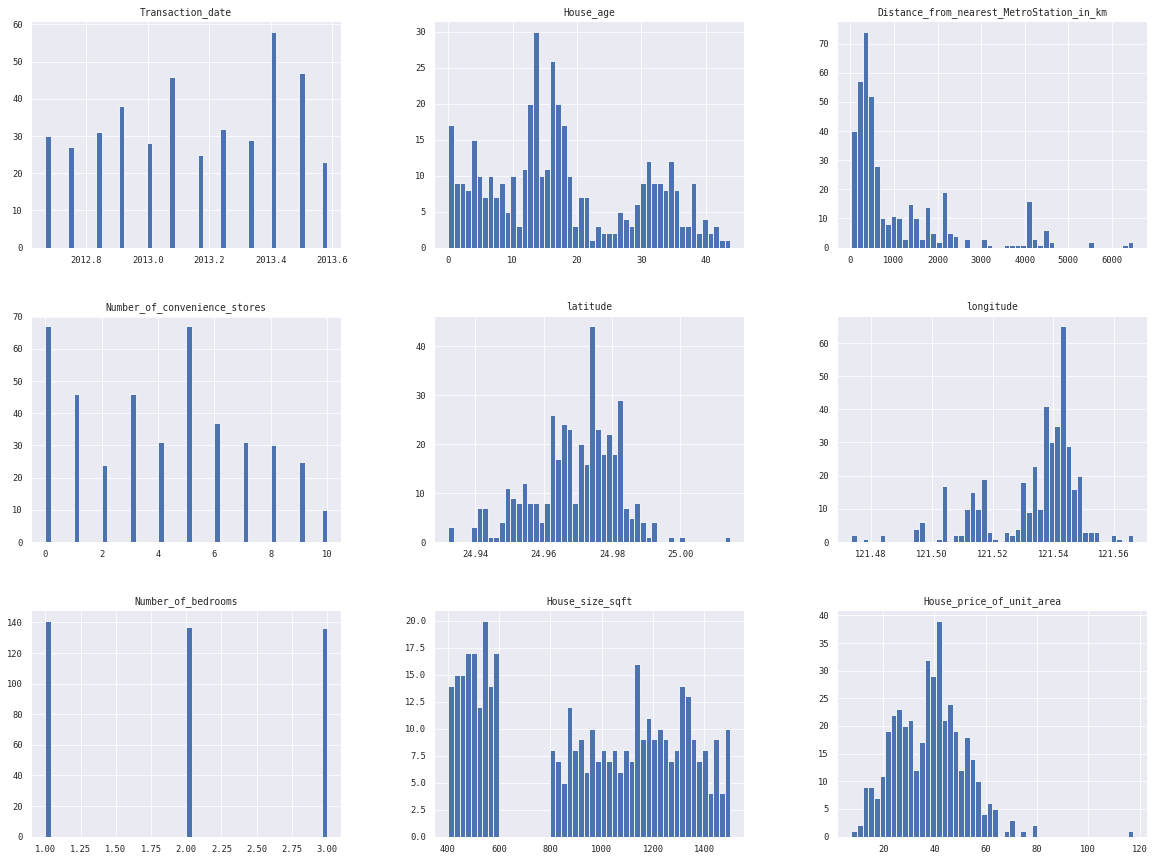

In [130]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

Text(0, 0.5, 'count')

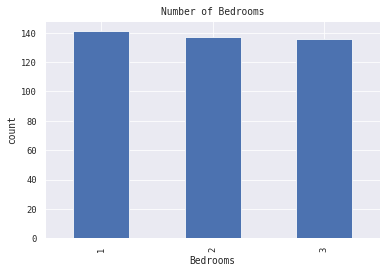

In [131]:
# Which is the most common house (Bedroom wise)
dataset['Number_of_bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('count')

### Visualizing the location of the houses based on latitude and longitude.

C:\AMD\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

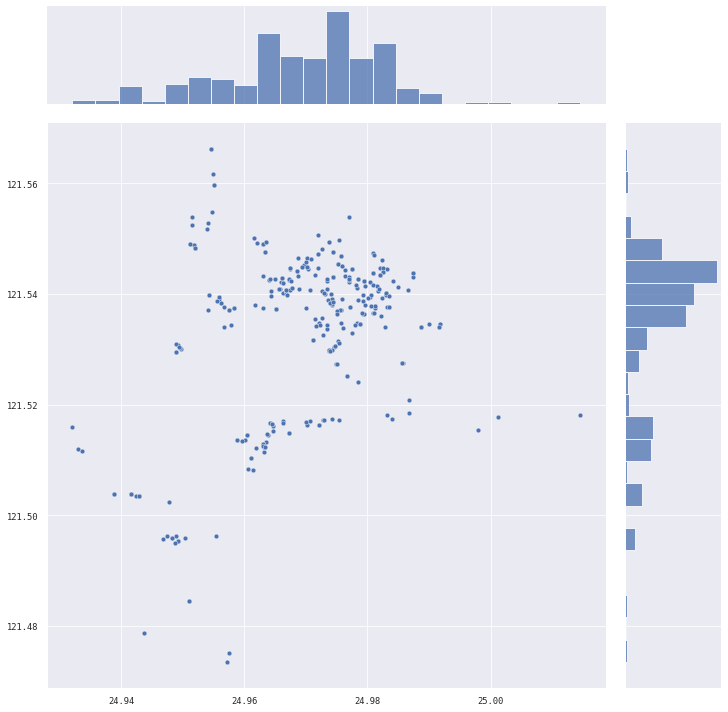

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [132]:
plt.figure(figsize=(10,10))
sns.jointplot(x=dataset.latitude.values, y=dataset.longitude.values, size=10)
plt.ylabel('Longitude',fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Square feet')

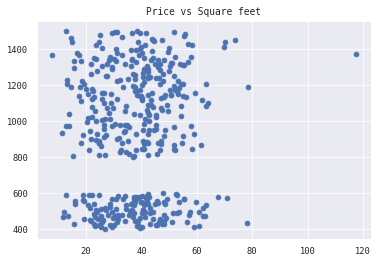

In [133]:
plt.scatter(dataset.House_price_of_unit_area,  dataset.House_size_sqft)
plt.title('Price vs Square feet')

Text(0.5, 1.0, 'Price vs Location of the area')

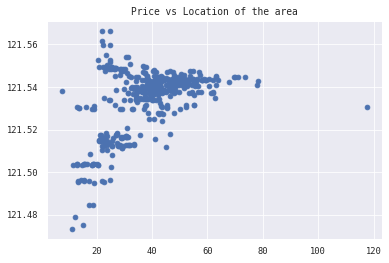

In [134]:
plt.scatter(dataset.House_price_of_unit_area,dataset.longitude)
plt.title("Price vs Location of the area")

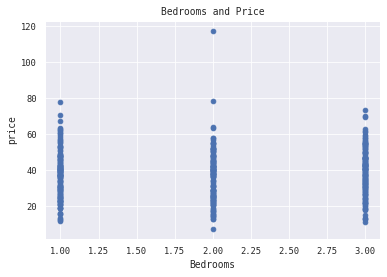

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [135]:
plt.scatter(dataset.Number_of_bedrooms,dataset.House_price_of_unit_area)
plt.title('Bedrooms and Price')
plt.xlabel("Bedrooms")
plt.ylabel("price")
plt.show()
sns.despine

Text(0.5, 1.0, 'House_age vs House_price_of_unit_area')

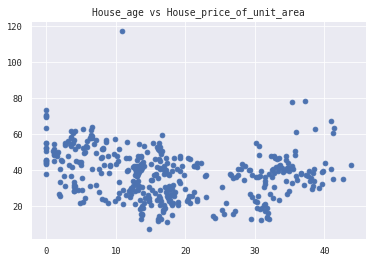

In [136]:
plt.scatter(dataset.House_age,dataset.House_price_of_unit_area)
plt.title('House_age vs House_price_of_unit_area')


Text(0.5, 1.0, 'Distance_from_nearest_MetroStation_in_km vs House_price_of_unit_area')

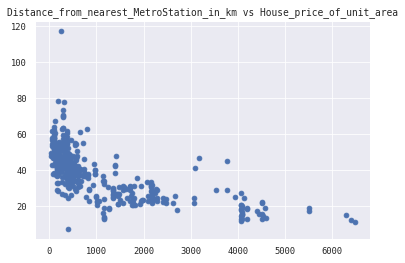

In [137]:
plt.scatter(dataset.Distance_from_nearest_MetroStation_in_km,dataset.House_price_of_unit_area)
plt.title('Distance_from_nearest_MetroStation_in_km vs House_price_of_unit_area')

Text(0.5, 1.0, 'Transaction_date vs House_price_of_unit_area')

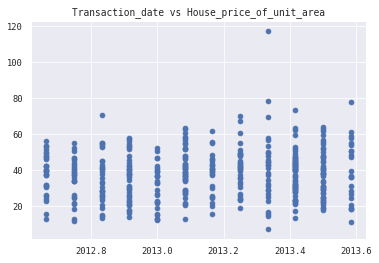

In [138]:
plt.scatter(dataset.Transaction_date,dataset.House_price_of_unit_area)
plt.title('Transaction_date vs House_price_of_unit_area')

Text(0.5, 1.0, 'Number_of_convenience_stores vs House_price_of_unit_area')

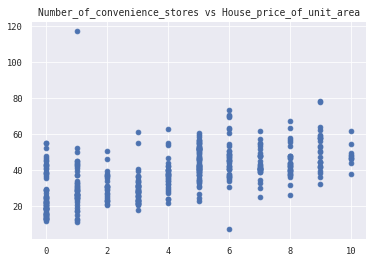

In [139]:
plt.scatter(dataset.Number_of_convenience_stores,dataset.House_price_of_unit_area)
plt.title('Number_of_convenience_stores vs House_price_of_unit_area')

As we can see from all the above representation that many factors are affecting the prices of the house , like square feet which increases the price of the house and even location influencing the prices of the house.

Now that we are familiar with all these representation and can tell our own story.Now going to move and create a model to which would predict the price of the house based upon the other factors such as square feet , location etc .

In [140]:
# Correlation metrix
hcorr = dataset.corr()
hcorr.style.background_gradient()

,Transaction_date,House_age,Distance_from_nearest_MetroStation_in_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
Transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance_from_nearest_MetroStation_in_km,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number_of_convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number_of_bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House_size_sqft,0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House_price_of_unit_area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


<AxesSubplot:>

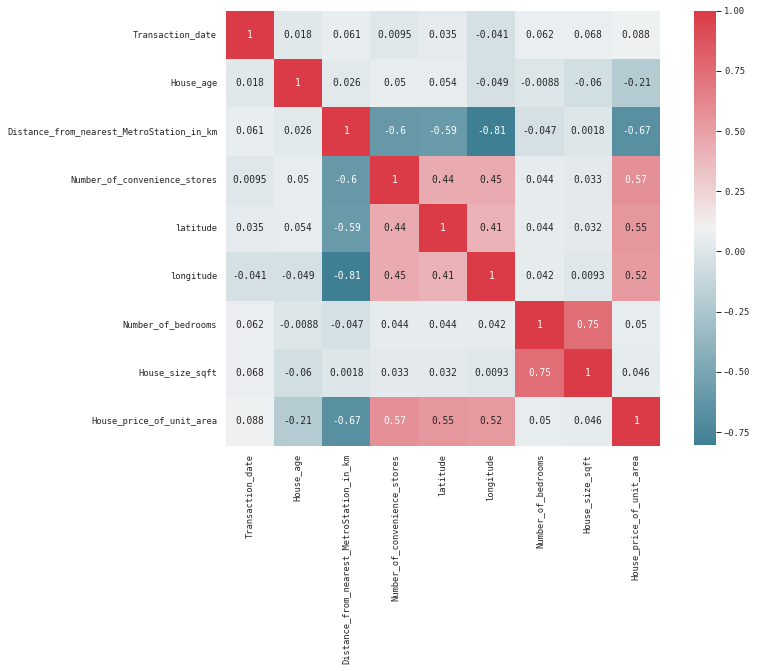

In [142]:
# Heatmap using seaborn 
sns.set(context='paper',font='monospace')
dataset_corr_matrix = dataset.corr()

# set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))

# Generate color polettes 
cmap = sns.diverging_palette(220,10,center='light',as_cmap=True)

#Draw the heatmap
sns.heatmap(dataset_corr_matrix,square=True, cmap=cmap,annot =True)

### Split the dataset into train and test

In [145]:
# preprocessing the data for splitting into train and test
dataset_ind = dataset.drop('House_price_of_unit_area',axis=1)
print(dataset_ind.head())
dataset_dep =dataset['House_price_of_unit_area']

print("House_price_of_unit_area")
print(dataset_dep.head())

   Transaction_date  House_age  Distance_from_nearest_MetroStation_in_km  \
0       2012.916667       32.0                                  84.87882   
1       2012.916667       19.5                                 306.59470   
2       2013.583333       13.3                                 561.98450   
3       2013.500000       13.3                                 561.98450   
4       2012.833333        5.0                                 390.56840   

   Number_of_convenience_stores  latitude  longitude  Number_of_bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House_size_sqft  
0              575  
1             1240  
2             1060  
3 

In [148]:
# Check for rand_state
X_train,X_test,y_train,y_test =train_test_split(dataset_ind,dataset_dep,test_size=0.2,random_state=42)

#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(X_test.head())

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (331, 8) and size 2648
X_test shape (83, 8) and size 664
y_train shape (331,) and size 331
y_test shape (83,) and size 83


In [143]:
dataset.head()

,Transaction_date,House_age,Distance_from_nearest_MetroStation_in_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [150]:
# the train independent variables
X_train.head()

,Transaction_date,House_age,Distance_from_nearest_MetroStation_in_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft
192,2013.166667,43.8,57.58945,7,24.96750,121.54069,3,1000
234,2013.250000,8.0,2216.61200,4,24.96007,121.51361,1,494
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,3,828
45,2013.083333,36.6,488.81930,8,24.97015,121.54494,1,572
245,2013.416667,7.5,639.61980,5,24.97258,121.54814,2,1219


### Standardize the data

In [153]:
# Standardize training and test datasets

# Feature scaling is to bring all the independent variables in a dataset into same scale, to avoid any variable dominating
#the model, Here we will not transform the dependent variables.

independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,1])
print('test data')
print(X_test[0:5,1])


[ 2.34401494 -0.82128138 -0.90085586  1.70741903 -0.86548943]
test data
[-1.43135245 -0.36151767 -1.52861016 -0.40572571  0.25739502]


### Linear Regression

Perform Linear Regression on training data output for test dataset using the fitted model Print root mean squared error (RMSE) from Linear Regression (importing mean_squared_error from sklearn metrics)

In [154]:
# Initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)

# Fit the model to the training and coefficients
linearRegModel.fit(X_train,y_train)
# print the intercept and coefficient

print("Intercept is "+str(linearRegModel.intercept_))
print("coefficient is "+str(linearRegModel.coef_))

Intercept is 38.39154078549849
coefficient is [ 1.49886596 -3.01603553 -5.84573055  3.17483201  2.81894774 -0.47753505
 -0.1308024   0.68596562]


In [155]:
# Predict on the test data
y_pred = linearRegModel.predict(X_test)

In [156]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

83
83
[47.98193109 41.58475049 44.74158856 39.56897075 28.25053404]
358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
Name: House_price_of_unit_area, dtype: float64


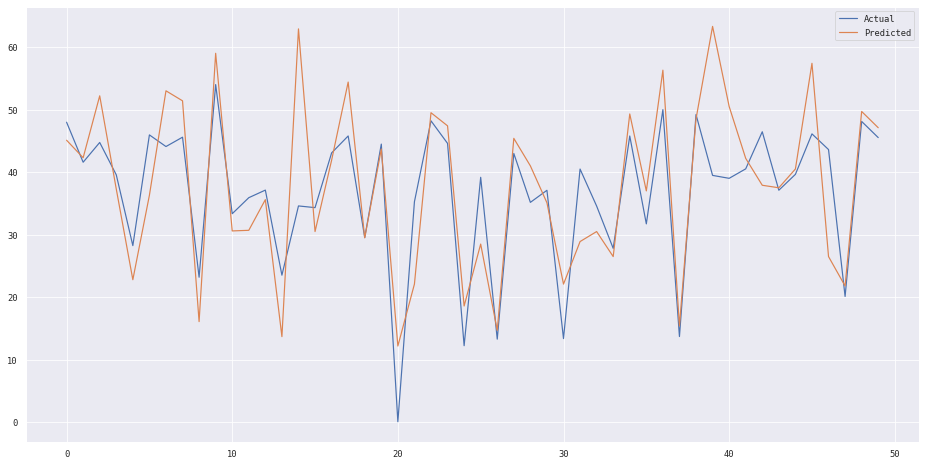

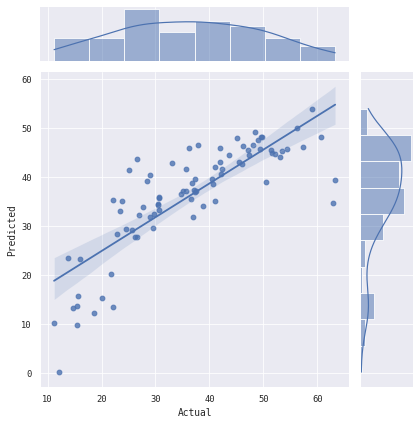

In [190]:
# Plotting the test and the predicted results
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

### Root Mean Squared Error (RMSE)

In [171]:
# Accuracy metrics
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))


7.454135914547555
9.097513878212775


### Perform Decision Tree Regression

Perform Decision Tree Regression on training data Predict output for test dataset using the fitted model.
Print root mean squared error from Decision Tree Regression

In [173]:
# Instantiating and fitting the decision tree regression
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [175]:
# Predictions
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([49.65      , 39.01538462, 43.5       , 29.3       , 25.6       ,
       36.5       , 53.51428571, 53.51428571, 12.8       , 61.46666667,
       21.5       , 32.18      , 48.        , 13.8       , 32.85      ,
       24.43076923, 32.95      , 57.8       , 24.43076923, 41.73076923,
       13.775     , 24.43076923, 54.65      , 26.9       , 12.9       ,
       29.3       , 13.775     , 43.5       , 41.        , 28.5       ,
       22.6       , 24.43076923, 38.24      , 26.975     , 53.51428571,
       38.31      , 52.65      , 13.775     , 36.5       , 60.7       ,
       54.8       , 39.01538462, 46.4       , 39.01538462, 39.01538462,
       52.65      , 39.01538462, 24.43076923, 46.39      , 53.3       ,
       49.65      , 56.9       , 38.31      , 41.73076923, 39.01538462,
       13.775     , 38.31      , 27.3       , 24.43076923, 53.51428571,
       24.43076923, 25.9       , 13.775     , 12.9       , 24.7       ,
       25.6       , 25.6       , 39.01538462, 38.31      , 26.97

In [194]:
print(len(dtReg_y_pred))
print(len(y_test))
print(dtReg_y_pred[0:10])
print(y_test[0:10])

83
83
[49.65       39.01538462 43.5        29.3        25.6        36.5
 53.51428571 53.51428571 12.8        61.46666667]
358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
72     36.3
262    53.0
140    51.4
93     16.1
70     59.0
Name: House_price_of_unit_area, dtype: float64


In [177]:
# Accuracy score
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))

7.789184274421779


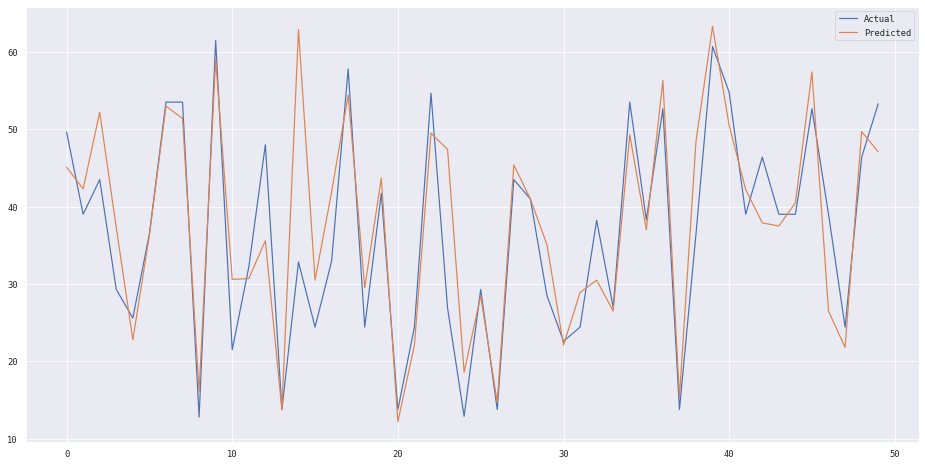

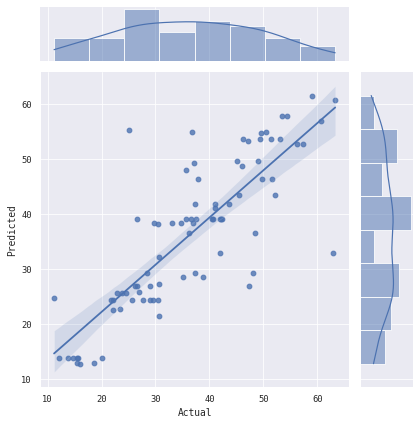

In [191]:
# Plotting the test and the predicted results
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

### Perform Random Forest Regression

Perform Random Forest Regression on training data . Predict output for test dataset using the fitted model. Print RMSE (Root mean square error) from Random Forest Regression

In [182]:
# Random forest regressor 
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [193]:
# Predictions 
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:10])
print(y_test[0:10])

83
83
[48.66666667 39.18       54.98333333 36.78666667 26.61       46.25666667
 49.35       52.23       15.40333333 59.31666667]
358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
72     36.3
262    53.0
140    51.4
93     16.1
70     59.0
Name: House_price_of_unit_area, dtype: float64


In [186]:
# Accuracy Score
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

5.782578483890736


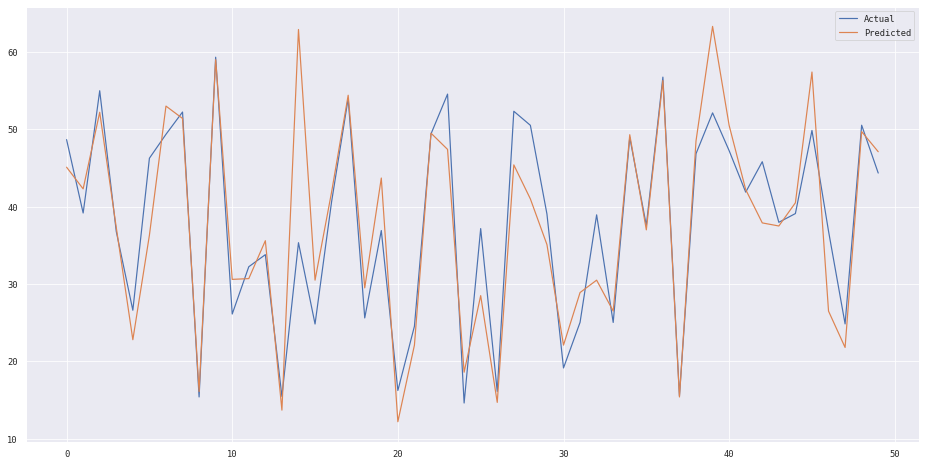

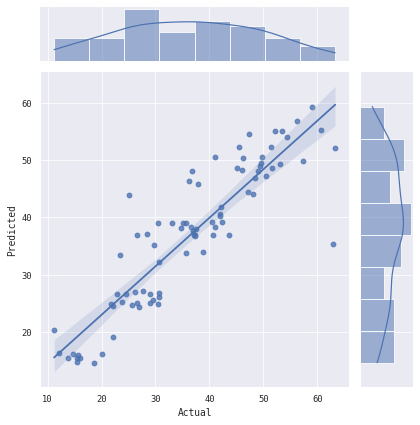

In [192]:
# Plotting the test and the predicted results
test = pd.DataFrame({'Predicted':rfReg_y_pred,'Actual':y_test})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);